# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [2]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
warnings.filterwarnings('ignore')

In [3]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [4]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour
del bikes.index.name

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

### En general, se rentan mas ciclas cuando es día de trabajo. Lo que nos indica que la renta se utiliza para ir a trabajar y para volver a casa l uego de la jornada laboral.

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Las hora 4:00pm y 5:00pm son las mas frecuentes, lo que confirma las aseveraciones anteriores, las personas tienden a rentar para volver a casa luego de la jornada laboral. Tambien resaltan la  hora 8:00am, es decir al salir hacia el trabajo.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

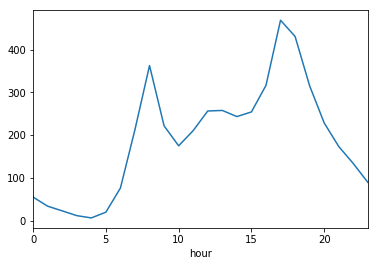

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

### En el grafico se evidencia que la renta de ciclas se da prioritariamente al salir y al volver del trabajo. Entre 7-9 de la mañana y entre3-6de la tarde respectivamente.

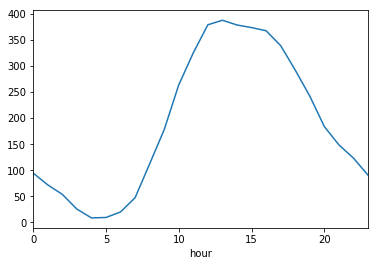

In [11]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

### Los días que no son laborales, la renta de ciclas tiene mayor variabilidad a lo largo del día,  ya que los moivos de renta son para ocio, que no tienen horaios puntuales.

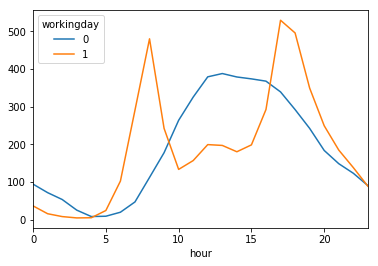

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

### En el gráfico se observa que en los días laborales, la renta de ciclas e da en horas puntuales (Al iniciio y la finalizar jornadas laobrales). En contrastecon días no laborales, en los que la renta de ciclas comienza y termina mas tarde respecto a los días  laborales.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Definir Variables
x=bikes[['hour','workingday']]
y=bikes[['total']]

#Partir sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

#Modelo de reg Lineal
linreg=LinearRegression().fit(X_train,y_train)

In [14]:
print(linreg.coef_)
linreg.score(X_test,y_test)

[[10.48146589  5.35826385]]


0.16346843230522556

### La interpretacion de los coeficientes de la regresion lineal, se da comosigue. Por una unidad que aumente la hora, la cantidad de rentasaumenta en 10 unidades. Lo cual contrasta con los gráficos expuestos anteriormente. En adicion, los días l aborales favorecen la renta de ciclas en un 24%, lo que tamppoco es cierto, ya que los graficos demuestran que la renta de ciclas tanto en días laborales como no laborales tiene la misma escala.

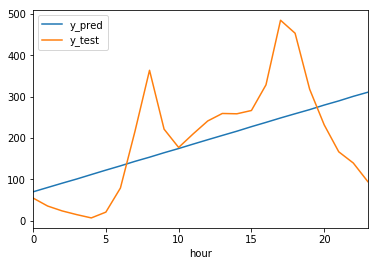

In [15]:
val=round(pd.DataFrame(linreg.predict(X_test),columns=['y_pred']),0)
val['y_test']=y_test.reset_index()['total']
val['hour']=y_test.index.hour


# plot the predictions
val.groupby(['hour'])['y_pred','y_test'].mean().plot()

### En el gráfico se observa que la relacion de los datos no es lineal.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [16]:
#Crear el dataframe para trabajar
df=bikes[['workingday','hour','total']]
df.reset_index(inplace=True,drop=True)
df.head()

,workingday,hour,total
0,0,0,16
1,0,1,40
2,0,2,32
3,0,3,13
4,0,4,1


### El output de la siguiente funcion, es el feature que mejor predice la renta, de acuerdo con el MSE. Adicionalmente genera el punto de corte ideal. El argumento es un dataset con el numero total de rentas, la hora de renta y el workingday.

In [17]:
#Funcion para comparar variables

def criterio(df):
    def error_hora(df):
        mse=1000000000
        for i in df.hour.unique():
            df['pred'] = df.loc[df.hour<i, 'total'].mean()
            df.loc[df.hour>=i, 'pred'] = df.loc[df.hour>=i, 'total'].mean()
            if mse>(((df['total'] - df['pred'])**2).mean()) ** 0.5:
                mse=(((df['total'] - df['pred'])**2).mean()) ** 0.5
                hora=i
        return mse,hora
    
    def error_dia(df): 
        mse=1000000000
        for i in df.workingday.unique():
            df['pred'] = df.loc[df.workingday<i, 'total'].mean()
            df.loc[df.workingday>=i, 'pred'] = df.loc[df.workingday>=i, 'total'].mean()
            if mse>(((df['total'] - df['pred'])**2).mean()) ** 0.5:
                mse=(((df['total'] - df['pred'])**2).mean()) ** 0.5
                wday=i
        return mse,wday
    
    if error_hora(df)[0]>error_dia(df)[0]:
        print ('WorkingDay ',error_dia(df)[1],'\nECM:',round(error_dia(df)[0],1),'\n')
    else:
        print ('Hora ',error_hora(df)[1],'\nECM:',round(error_hora(df)[0],1),'\n')
        

In [18]:
criterio(df)

Hora  7 
ECM: 150.2 



### El paso a seguir es dividir el dataset, de acuerdo con la salida de la funcion.

In [19]:
train_izq = df.loc[df.hour<7].copy()
print(train_izq.head())
criterio(train_izq)

############################

train_der = df.loc[df.hour>=7].copy()
train_der.head()
criterio(train_der)

   workingday  hour  total        pred
0           0     0     16  196.036433
1           0     1     40  196.036433
2           0     2     32  196.036433
3           0     3     13  196.036433
4           0     4      1  196.036433
Hora  6 
ECM: 35.2 

Hora  21 
ECM: 166.7 



### El paso a seguir es dividir el dataset, de acuerdo con la salida de la funcion.

In [20]:
train_izq_izq = train_izq.loc[train_izq.hour<6].copy()
print(train_izq_izq.head())
criterio(train_izq_izq)

############################
train_izq_der = train_izq.loc[train_izq.hour>=6].copy()
train_izq_der.head()
criterio(train_izq_der)

   workingday  hour  total      pred
0           0     0     16  25.17772
1           0     1     40  25.17772
2           0     2     32  25.17772
3           0     3     13  25.17772
4           0     4      1  25.17772
Hora  2 
ECM: 27.5 

WorkingDay  1 
ECM: 38.9 



### El paso a seguir es dividir el dataset, de acuerdo con la salida de la funcion.

In [21]:
train_izq_der_izq = train_izq_der.loc[train_izq_der.workingday==0].copy()
print(train_izq_der_izq.head())
##############################################
train_izq_der_der = train_izq_der.loc[train_izq_der.workingday==1].copy()
print(train_izq_der_der.head())

     workingday  hour  total       pred
6             0     6      2  19.993103
29            0     6      2  19.993103
167           0     6      2  19.993103
191           0     6      1  19.993103
330           0     6      3  19.993103
     workingday  hour  total        pred
51            1     6     30  102.577419
74            1     6     36  102.577419
97            1     6     33  102.577419
120           1     6     36  102.577419
143           1     6     34  102.577419


### Para obtener 6 nodos finales, se requieren 5 particiones binarias, por tal razon, resta una particion:

In [22]:
train_der_der = train_der.loc[train_der.hour>=21].copy()
train_der_der.head()
criterio(train_der_der)

Hora  23 
ECM: 73.0 



### El paso a seguir es dividir el dataset, de acuerdo con la salida de la funcion.

In [23]:
train_der_der = train_der.loc[train_der.hour<23].copy()
print(train_der_der.head())
#################################
train_der_izq = train_der.loc[train_der.hour>=23].copy()
train_der_izq.head()

    workingday  hour  total        pred
7            0     7      3  266.408586
8            0     8      8  266.408586
9            0     9     14  266.408586
10           0    10     36  266.408586
11           0    11     56  266.408586


,workingday,hour,total,pred
23,0,23,39,89.508772
46,0,23,8,89.508772
68,1,23,12,89.508772
91,1,23,11,89.508772
114,1,23,19,89.508772


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [24]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

######################

import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, bikes[['workingday','hour']], bikes[['total']], cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

######################

treereg = DecisionTreeRegressor(random_state=1,max_leaf_nodes=6)
treereg.fit(bikes[['workingday','hour']], bikes[['total']])
print(treereg)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=6, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
